In [63]:
"""
Notebook to take in video file and export as series of still frames.  To be used in semantic segmenation work.
"""
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import os
%matplotlib inline

rootdir = "/home/andy/Grass_Detection/" # stills dir
viddir = "/media/andy/Seagate Backup Plus Drive/video/" # video dir

#generate list of videos and directories in root directory
vids_list = []
dirs_list = []
for roots, dirs, files in os.walk(viddir):
    for file in files:
        if file.endswith('mp4'):
            vids_list.append(file)
    for dirs in dirs:
        if dirs[-11:] != 'checkpoints': #does not record jupyter 'checkpoints'
            dirs_list.append(dirs)
            
print "Videos in root: ", vids_list
print "Directories in root: ", dirs_list

Videos in root:  ['both_12172018.mp4', 'Grass_12172018.mp4', 'notGrass_12172018.mp4']
Directories in root:  []


In [36]:
"""
open video file, and save frames to "save_dir" as jpeg
"""
frame_num = 0 #frame counter
num_max = 2000 #max number of frames to parse

for vid in vids_list:
    file_in = viddir + vid
    print "Converting:", file_in
    #load in video
    vid_cap = cv.VideoCapture(file_in)

    #display image data
    width = vid_cap.get(3)
    height = vid_cap.get(4)
    ffps = vid_cap.get(5)
    length = vid_cap.get(7) 
    duration = (length/ffps) #seconds

    file_metadata =[height,width,ffps,length,duration]

    print "\nFile Metadata:"
    print "Frame size: %d,%d (h x w)"%(height,width)
    print "Video Frame Rate: %ifps"%ffps
    print "Length of Video: %i frames"%length
    print "Video Duration: %i sec\n"%duration

    while vid_cap.isOpened():
        #print "Processing Frame: %i"%frame_num
        #Capture frame-by-frame still from video
        ret, image = vid_cap.read()
        if ret == True:
            frame = image
        else:
            print 'read error.'
            break

        #Write frame out as 'jpg'
        save_dir = rootdir + vid[0:-4]
        #print save_dir
        cv.imwrite(save_dir +"_%d.jpg"%frame_num,image)

        #print "end of frames" for last frame
        if frame_num == num_max:
            print "\nMax number of frames reached!\nAborting export.\n"
            frame_num = 0
            break
        else: 
            frame_num +=1
        if cv.waitKey(25) & 0xFF == ord('q'):
            break    
    

Converting: /media/andy/Seagate Backup Plus Drive/video/both_12172018.mp4

File Metadata:
Frame size: 1080,1920 (h x w)
Video Frame Rate: 35fps
Length of Video: 508 frames
Video Duration: 14 sec

read error.
Converting: /media/andy/Seagate Backup Plus Drive/video/Grass_12172018.mp4

File Metadata:
Frame size: 1080,1920 (h x w)
Video Frame Rate: 29fps
Length of Video: 1363 frames
Video Duration: 45 sec

read error.
Converting: /media/andy/Seagate Backup Plus Drive/video/notGrass_12172018.mp4

File Metadata:
Frame size: 1080,1920 (h x w)
Video Frame Rate: 30fps
Length of Video: 1166 frames
Video Duration: 38 sec


Max number of frames reached!
Aborting export.



Grass_12172018_1344.jpg
Grass_12172018_1554.jpg
Grass_12172018_1140.jpg
Grass_12172018_1614.jpg


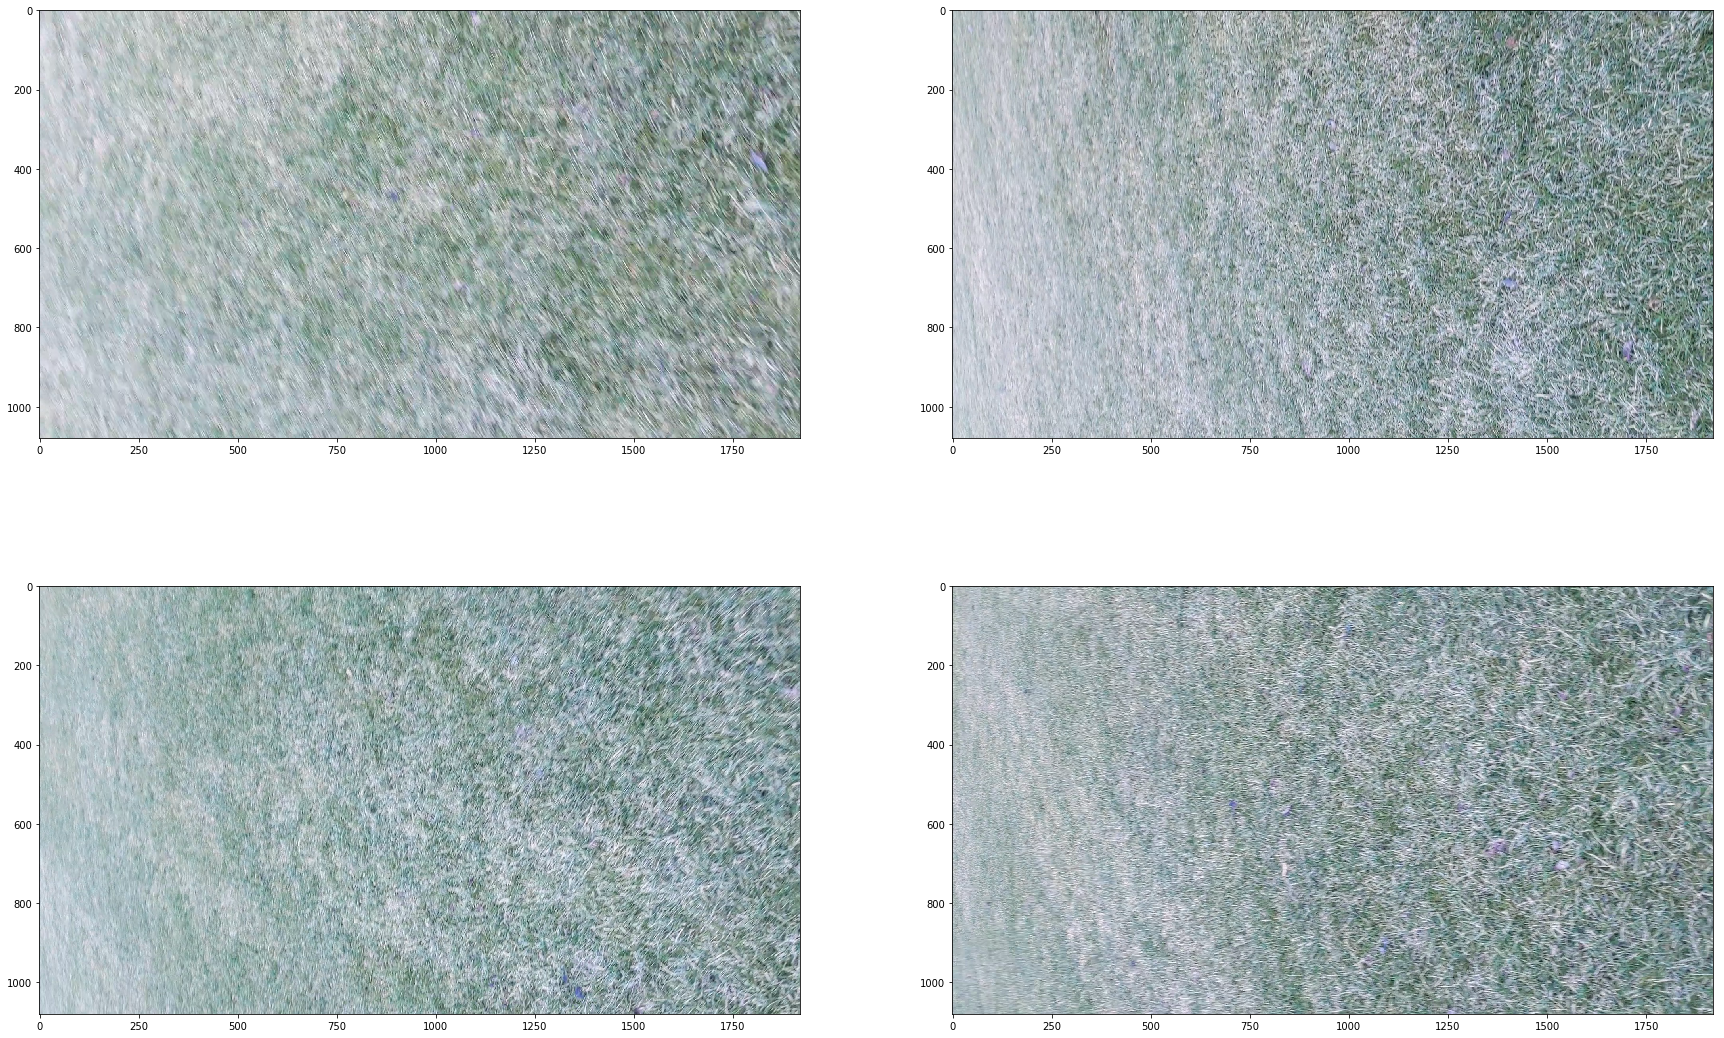

In [216]:
grass_imgs_dir = os.path.join(rootdir,'grass_stills'+'/')

grass_imgs = []
for array in os.walk(grass_imgs_dir):
    for list in array[2]:
        grass_imgs.append(list)

plt.figure(figsize=(30,30))
i=0
for picture in grass_imgs[0:4]:
    plt.subplot(321+i)
    i+=1
    print picture
    pic_path = grass_imgs_dir + picture
    img = cv.imread(pic_path,1)
    plt.imshow(img)

notGrass_12172018_1983.jpg
notGrass_12172018_1943.jpg
notGrass_12172018_1887.jpg
notGrass_12172018_1916.jpg
notGrass_12172018_1942.jpg
notGrass_12172018_5.jpg


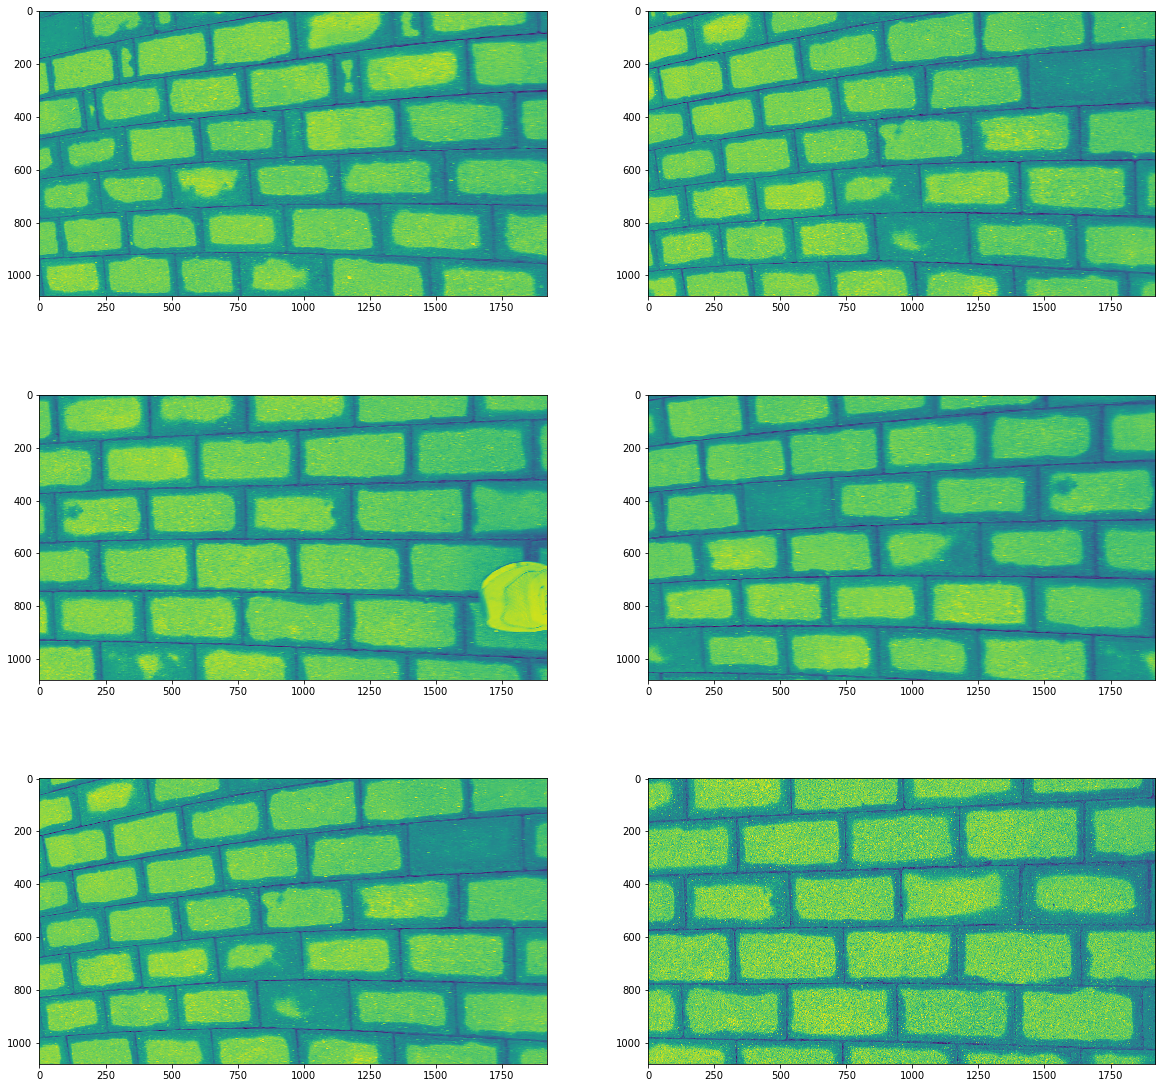

In [217]:
notgrass_imgs_dir = os.path.join(rootdir,'notGrass_stills'+'/')

notgrass_imgs = []
for array in os.walk(notgrass_imgs_dir):
    for list in array[2]:
        notgrass_imgs.append(list)
    
plt.figure(figsize=(20,20))
i=0
for picture in notgrass_imgs[0:6]:
    plt.subplot(321+i)
    i+=1
    print picture
    pic_path = notgrass_imgs_dir + picture
    img = cv.imread(pic_path,0)
    plt.imshow(img)